In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load the Excel file
input_file = "datasets/StudentGradesAndPrograms.xlsx"
output_file = "formatting_file.csv"

# Read the CSV file
df = pd.read_excel(input_file)

# Save it as a CSV
df.to_csv(output_file, index=False)
print(f"File successfully converted to {output_file}")

dataset = pd.read_csv(output_file, header=1, names=["schoolyear", "gradeLevel", "classPeriod", "classType", "schoolName", "gradePercentage", "avid", "sped", "migrant", "ell", "student_ID"])


File successfully converted to formatting_file.csv


C:\Users\K3500PC\AppData\Local\Temp\ipykernel_20284\3759737291.py:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(output_file, header=1, names=["schoolyear", "gradeLevel", "classPeriod", "classType", "schoolName", "gradePercentage", "avid", "sped", "migrant", "ell", "student_ID"])


classType
ART    92.287365
ELE    81.220496
ENG    75.919145
IN     83.859245
MAT    76.814344
MS     71.890156
MUS    91.892338
PE     93.333645
SCI    78.609556
SOC    80.377539
Name: gradePercentage, dtype: float64


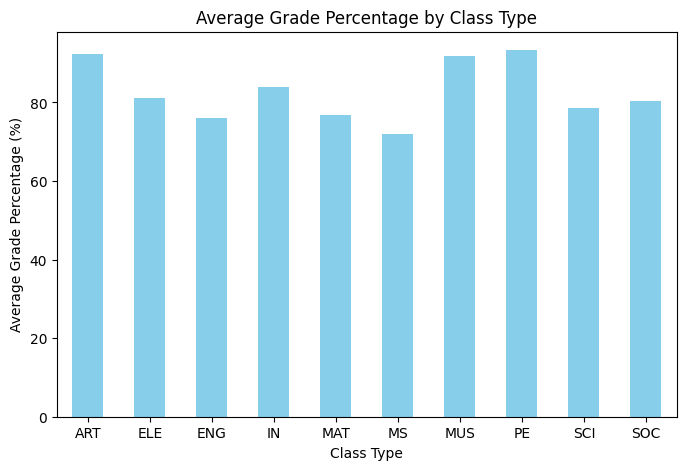

In [3]:
"""
- How does the average grade percentage vary across different class types (e.g., ENG, MAT, SCI, SOC)?

"""
# Group by classType and calculate the average gradePercentage
average_grades = dataset.groupby('classType')['gradePercentage'].mean()

print(average_grades)

# Format the numbers to 2 d.p. with a % symbol
average_grades_percent = average_grades.map("{:.2f}%".format)


with open('average_grade_percent.txt', 'w', encoding='utf-8') as outfile:
    outfile.write(average_grades_percent.to_string(index=False, header=True))
    outfile.close()


# Visualization
average_grades.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Average Grade Percentage by Class Type')
plt.xlabel('Class Type')
plt.ylabel('Average Grade Percentage (%)')
plt.xticks(rotation=0)
plt.show()

ell
N    81.38%
Y    79.44%
Name: gradePercentage, dtype: object


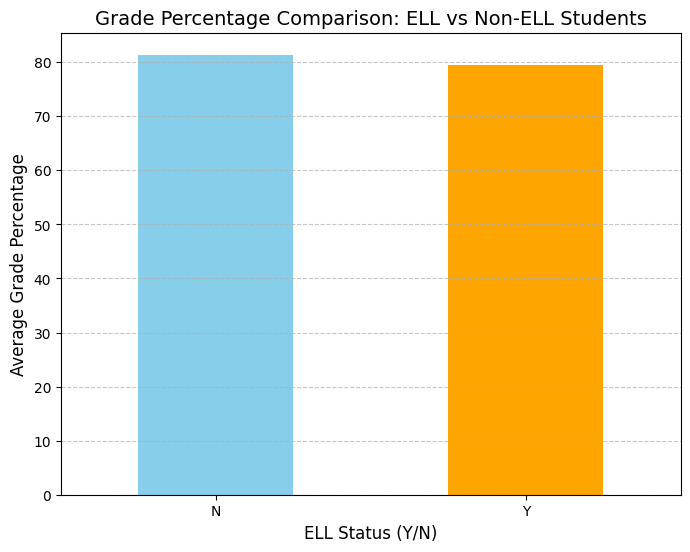

In [4]:
"""
- How do grade percentages differ for English learners (ell = Y) versus non-English learners?

"""

# Calculate average grade percentages for ELL and non-ELL students
ell_comparison = df.groupby('ell')['gradePercentage'].mean()


# Format the numbers to 2 d.p. with a % symbol
ell_comparison_percent = ell_comparison.map("{:.2f}%".format)
print(ell_comparison_percent)


with open('average_grade_ell_and_non_ell.txt', 'w', encoding='utf-8') as ellfile:
    ellfile.write(ell_comparison_percent.to_string(index=False, header=True))
    ellfile.close()


# The Bar chart will help us visually compare the performance of English learners and non-English learners.
ell_comparison.plot(kind='bar', color=['skyblue', 'orange'], figsize=(8, 6))
plt.title('Grade Percentage Comparison: ELL vs Non-ELL Students', fontsize=14)
plt.xlabel('ELL Status (Y/N)', fontsize=12)
plt.ylabel('Average Grade Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



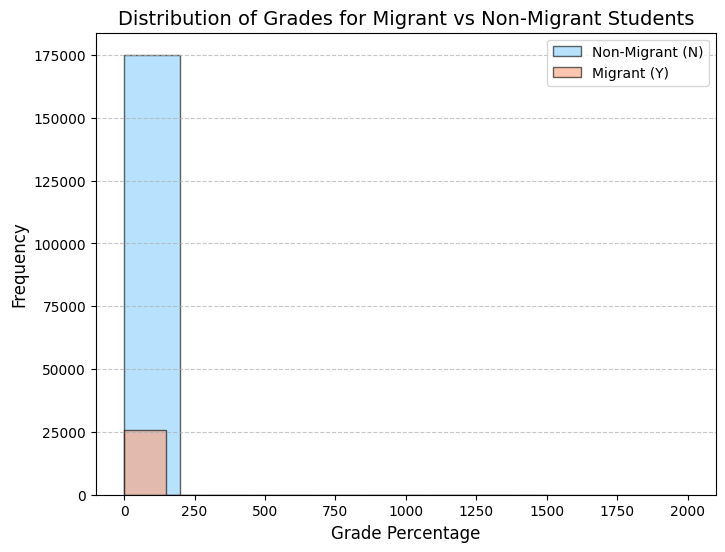

In [5]:
""" 
- Is there a performance gap between migrant students (migrant = Y) and non-migrant students (migrant = N)?

"""

# Extract data for migrant and non-migrant students
migrant_grades = dataset[dataset['migrant'] == 'Y']['gradePercentage']
non_migrant_grades = dataset[dataset['migrant'] == 'N']['gradePercentage']


# Histogram
plt.figure(figsize=(8, 6))
plt.hist(non_migrant_grades, bins=10, alpha=0.6, label='Non-Migrant (N)', color='lightskyblue', edgecolor='black')
plt.hist(migrant_grades, bins=10, alpha=0.6, label='Migrant (Y)', color='lightsalmon', edgecolor='black')


# Customize the Histogram
plt.title('Distribution of Grades for Migrant vs Non-Migrant Students', fontsize=14)
plt.xlabel('Grade Percentage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Show the Histogram
plt.show()


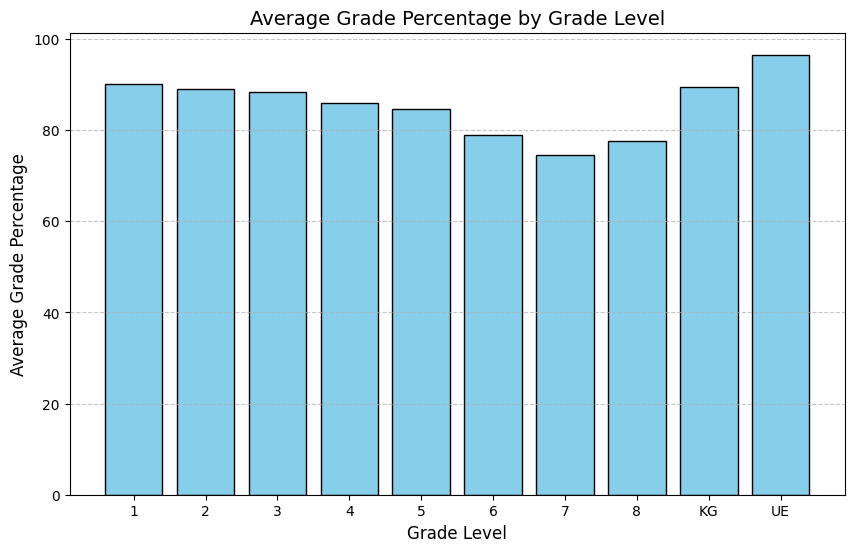

In [6]:
""" 
- Which grade level performs better overall?

"""

# Calculate the average grade percentage for each grade level
average_grades_level = dataset.groupby('gradeLevel')['gradePercentage'].mean().reset_index()

# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(average_grades_level['gradeLevel'], average_grades_level['gradePercentage'], color='skyblue', edgecolor='black')


# Customize the Bar Chart
plt.title('Average Grade Percentage by Grade Level', fontsize=14)
plt.xlabel('Grade Level', fontsize=12)
plt.ylabel('Average Grade Percentage', fontsize=12)
plt.xticks(ticks=average_grades_level['gradeLevel'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Show the Bar Chart
plt.show()


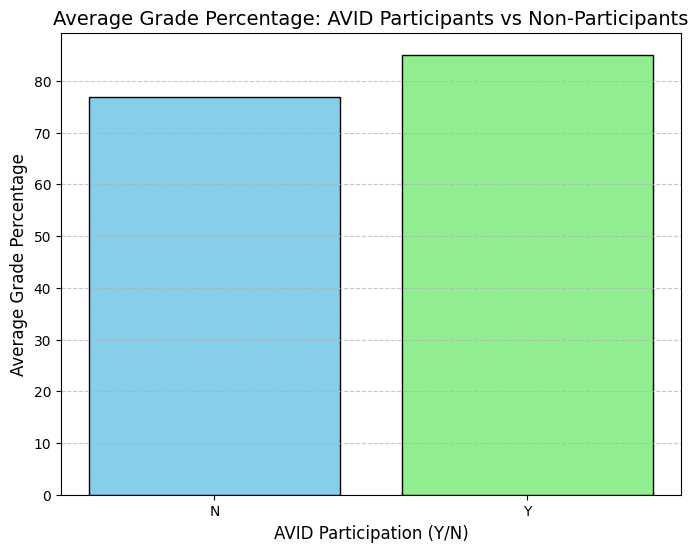

In [7]:
""" 
- Do students who participate in the AVID program (avid = Y) perform better than non-participants?

"""

# Calculate average grades for AVID participants and non-participants
avid_avg = dataset.groupby('avid')['gradePercentage'].mean().reset_index()

# Bar Chart for Average Grades
plt.figure(figsize=(8, 6))
plt.bar(avid_avg['avid'], avid_avg['gradePercentage'], color=['skyblue', 'lightgreen'], edgecolor='black')


# Customize Bar Chart
plt.title('Average Grade Percentage: AVID Participants vs Non-Participants', fontsize=14)
plt.xlabel('AVID Participation (Y/N)', fontsize=12)
plt.ylabel('Average Grade Percentage', fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Show Bar Chart
plt.show()
